<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [0]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 10
RMS = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
Data_Gen = ImageDataGenerator(
  featurewise_center = False,
  samplewise_center = False,
  featurewise_std_normalization = False,
  samplewise_std_normalization = False,
  rotation_range = 90,
  horizontal_flip = True,
  vertical_flip = True)

Data_Gen.fit(x_train)

In [41]:
#Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [0]:
#Compile model
history = model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [43]:
history = model.fit_generator(Data_Gen.flow(x_train, y_train, batch_size = batch_size),
                              steps_per_epoch = len(x_train) / 32,
                              epochs = epochs, 
                              validation_data=(x_val, y_val), 
                              shuffle = True)

Epoch 1/10
1250/1250 [==============================] - 250s 200ms/step - loss: 8.0570 - acc: 0.1212 - val_loss: 2.2076 - val_acc: 0.1808
Epoch 2/10
1250/1250 [==============================] - 251s 201ms/step - loss: 2.2998 - acc: 0.1644 - val_loss: 2.1074 - val_acc: 0.2318
Epoch 3/10
1250/1250 [==============================] - 250s 200ms/step - loss: 2.1498 - acc: 0.1977 - val_loss: 2.0315 - val_acc: 0.2638
Epoch 4/10
1250/1250 [==============================] - 250s 200ms/step - loss: 2.0869 - acc: 0.2159 - val_loss: 1.9731 - val_acc: 0.2760
Epoch 5/10
1250/1250 [==============================] - 251s 201ms/step - loss: 2.0410 - acc: 0.2374 - val_loss: 1.9423 - val_acc: 0.2881
Epoch 6/10
1250/1250 [==============================] - 251s 200ms/step - loss: 2.0109 - acc: 0.2507 - val_loss: 1.9169 - val_acc: 0.3021
Epoch 7/10
1250/1250 [==============================] - 251s 201ms/step - loss: 1.9848 - acc: 0.2631 - val_loss: 1.9003 - val_acc: 0.3086
Epoch 8/10
1250/1250 [============

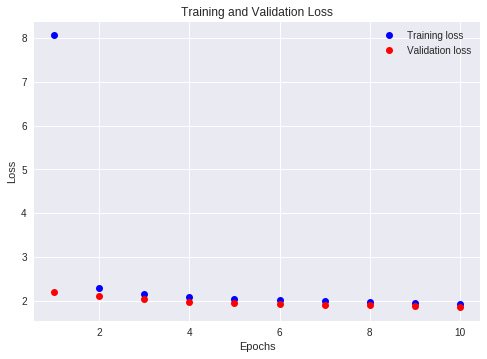

In [44]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

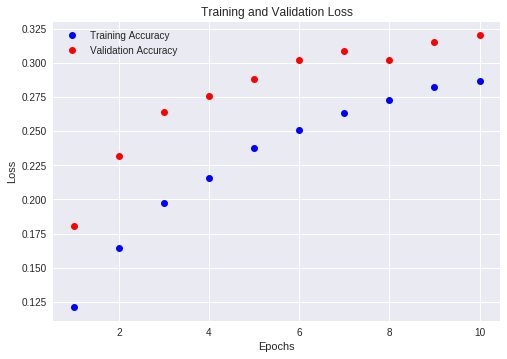

In [45]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
test_score = model.evaluate(x_test, y_test, verbose=1)
print('Loss:', test_score[0])
print('Accuracy:', test_score[1])

10000/10000 [==============================] - 17s 2ms/step
Loss: 1.8413412532806397
Accuracy: 0.3311
